# Online Shoppers Intention

I explore the [online shoppers intention dataset](https://archive.ics.uci.edu/ml/datasets/Online+Shoppers+Purchasing+Intention+Dataset). I use clustering techniques to analyze different types of customers.

## Data Exploration

In [1]:
import pandas as pd
data = pd.read_csv('data/online_shoppers_intention.csv')

In [2]:
data.head()

,Administrative,Administrative_Duration,Informational,Informational_Duration,ProductRelated,ProductRelated_Duration,BounceRates,ExitRates,PageValues,SpecialDay,Month,OperatingSystems,Browser,Region,TrafficType,VisitorType,Weekend,Revenue
0,0,0.0,0,0.0,1,0.000000,0.20,0.20,0.0,0.0,Feb,1,1,1,1,Returning_Visitor,False,False
1,0,0.0,0,0.0,2,64.000000,0.00,0.10,0.0,0.0,Feb,2,2,1,2,Returning_Visitor,False,False
2,0,0.0,0,0.0,1,0.000000,0.20,0.20,0.0,0.0,Feb,4,1,9,3,Returning_Visitor,False,False
3,0,0.0,0,0.0,2,2.666667,0.05,0.14,0.0,0.0,Feb,3,2,2,4,Returning_Visitor,False,False
4,0,0.0,0,0.0,10,627.500000,0.02,0.05,0.0,0.0,Feb,3,3,1,4,Returning_Visitor,True,False


In [3]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 12330 entries, 0 to 12329
Data columns (total 18 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   Administrative           12330 non-null  int64  
 1   Administrative_Duration  12330 non-null  float64
 2   Informational            12330 non-null  int64  
 3   Informational_Duration   12330 non-null  float64
 4   ProductRelated           12330 non-null  int64  
 5   ProductRelated_Duration  12330 non-null  float64
 6   BounceRates              12330 non-null  float64
 7   ExitRates                12330 non-null  float64
 8   PageValues               12330 non-null  float64
 9   SpecialDay               12330 non-null  float64
 10  Month                    12330 non-null  object 
 11  OperatingSystems         12330 non-null  int64  
 12  Browser                  12330 non-null  int64  
 13  Region                   12330 non-null  int64  
 14  TrafficType           

In [4]:
data.describe()

,Administrative,Administrative_Duration,Informational,Informational_Duration,ProductRelated,ProductRelated_Duration,BounceRates,ExitRates,PageValues,SpecialDay,OperatingSystems,Browser,Region,TrafficType
count,12330.000000,12330.000000,12330.000000,12330.000000,12330.000000,12330.000000,12330.000000,12330.000000,12330.000000,12330.000000,12330.000000,12330.000000,12330.000000,12330.000000
mean,2.315166,80.818611,0.503569,34.472398,31.731468,1194.746220,0.022191,0.043073,5.889258,0.061427,2.124006,2.357097,3.147364,4.069586
std,3.321784,176.779107,1.270156,140.749294,44.475503,1913.669288,0.048488,0.048597,18.568437,0.198917,0.911325,1.717277,2.401591,4.025169
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,1.000000,1.000000,1.000000
25%,0.000000,0.000000,0.000000,0.000000,7.000000,184.137500,0.000000,0.014286,0.000000,0.000000,2.000000,2.000000,1.000000,2.000000
50%,1.000000,7.500000,0.000000,0.000000,18.000000,598.936905,0.003112,0.025156,0.000000,0.000000,2.000000,2.000000,3.000000,2.000000
75%,4.000000,93.256250,0.000000,0.000000,38.000000,1464.157214,0.016813,0.050000,0.000000,0.000000,3.000000,2.000000,4.000000,4.000000
max,27.000000,3398.750000,24.000000,2549.375000,705.000000,63973.522230,0.200000,0.200000,361.763742,1.000000,8.000000,13.000000,9.000000,20.000000


In [11]:
# Select out numerical data
cat_attr = ['Month', 'OperatingSystems', 'Browser', 'Region', 'TrafficType', 'VisitorType', 'Weekend', 'Revenue']
num_data = data.drop(columns=cat_attr)

## Data Preparation

In [17]:
from sklearn.preprocessing import StandardScaler

stdscaler = StandardScaler()
num_data_prep = stdscaler.fit_transform(num_data)
num_data_prep

array([[-0.69699296, -0.4571914 , -0.3964779 , ...,  3.22931559,
        -0.31717784, -0.30882137],
       [-0.69699296, -0.4571914 , -0.3964779 , ...,  1.1714725 ,
        -0.31717784, -0.30882137],
       [-0.69699296, -0.4571914 , -0.3964779 , ...,  3.22931559,
        -0.31717784, -0.30882137],
       ...,
       [-0.69699296, -0.4571914 , -0.3964779 , ...,  0.89709343,
        -0.31717784, -0.30882137],
       [ 0.50722805, -0.03291592, -0.3964779 , ..., -0.45314046,
        -0.31717784, -0.30882137],
       [-0.69699296, -0.4571914 , -0.3964779 , ...,  0.48552481,
        -0.31717784, -0.30882137]])

## Clustering

In [62]:
# Kmeans
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score
import numpy as np

start = 2
N = 10
inertias = np.zeros((N,))
silhouettes = np.zeros((N,))

for k in range(start, start + N):
    kmeans = KMeans(n_clusters=k)
    kmeans.fit(num_data_prep)
    inertias[k-start] = kmeans.inertia_
    silhouettes[k-start] = silhouette_score(num_data_prep, kmeans.labels_)
ks = np.array(range(start, start + N))

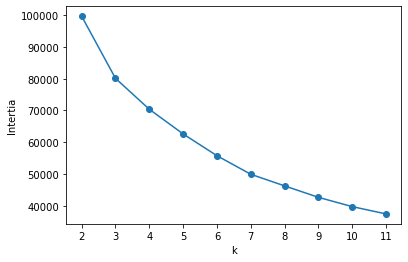

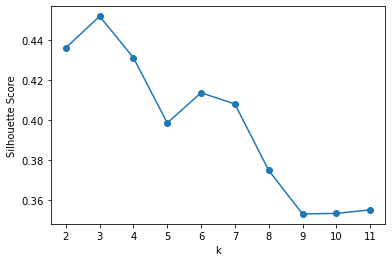

In [63]:
%matplotlib inline
import matplotlib.pyplot as plt

# Data for plotting
fig, ax = plt.subplots()
ax.plot(ks, inertias)
ax.scatter(ks, inertias)
ax.set(xlabel='k', ylabel='Intertia')
plt.xticks(ks)
plt.show()

fig, ax = plt.subplots()
ax.plot(ks, silhouettes)
ax.scatter(ks, silhouettes)
ax.set(xlabel='k', ylabel='Silhouette Score')
plt.xticks(ks)
plt.show()

In [86]:
# 3 or 4 clusters looks best
kmeans = KMeans(n_clusters=4)
kmeans.fit(num_data_prep)

KMeans(n_clusters=4)

In [87]:
clusters = np.array(kmeans.cluster_centers_)
for i, c in enumerate(clusters):
    print(f"Cluster {i}:")
    for j, attr in enumerate(num_data.columns):
        print(f"{attr}: {c[j]:.2f}")
    print()

Cluster 0:
Administrative: -0.37
Administrative_Duration: -0.29
Informational: -0.23
Informational_Duration: -0.18
ProductRelated: -0.11
ProductRelated_Duration: -0.15
BounceRates: -0.01
ExitRates: 0.13
PageValues: -0.21
SpecialDay: 3.13

Cluster 1:
Administrative: -0.16
Administrative_Duration: -0.15
Informational: -0.22
Informational_Duration: -0.18
ProductRelated: -0.18
ProductRelated_Duration: -0.17
BounceRates: -0.27
ExitRates: -0.23
PageValues: 0.02
SpecialDay: -0.29

Cluster 2:
Administrative: 1.54
Administrative_Duration: 1.31
Informational: 1.64
Informational_Duration: 1.33
ProductRelated: 1.51
ProductRelated_Duration: 1.42
BounceRates: -0.33
ExitRates: -0.49
PageValues: 0.21
SpecialDay: -0.23

Cluster 3:
Administrative: -0.69
Administrative_Duration: -0.45
Informational: -0.39
Informational_Duration: -0.24
ProductRelated: -0.66
ProductRelated_Duration: -0.60
BounceRates: 3.29
ExitRates: 2.99
PageValues: -0.32
SpecialDay: 0.02



We find four kinds of users. 
- Type 0 use the website primarily for special occassions, i.e. gifts for holidays. 
- Type 1 seem to simply be standard users; they aren't far from average in any category. 
- Type 2 are power users; they engage with many pages (admin, info, and product) for a long time. 
- Type 3 are short term users. They don't spend long on any page, and bounce off/exit very quickly.

For any new user, we can apply kmeans.predict to their data to determine their type.